In [32]:
# Importing all the necessary libraries in one go to avoid typing manual importing of each module one at a time

from pyforest import *
lazy_imports()

['from sklearn.linear_model import RidgeCV',
 'import imutils',
 'from sklearn.linear_model import ElasticNetCV',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.impute import SimpleImputer',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.ensemble import RandomForestRegressor',
 'import keras',
 'from pyspark import SparkContext',
 'import plotly.express as px',
 'from pathlib import Path',
 'import plotly as py',
 'import spacy',
 'from sklearn.preprocessing import OneHotEncoder',
 'import statistics',
 'import bokeh',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from PIL import Image',
 'import lightgbm as lgb',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.model_selection import GridSearchCV',
 'from fbprophet import Prophet',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from 

In [33]:
# Importing warnings library to avoid display of warnings prompted during cell executions

import warnings
warnings.filterwarnings("ignore")

In [34]:
# Loading train and test data in separate Dataframes
# We will use this Train_Data Dataframe to check to perform EDA 

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
# Display the first 5 rows of Train Data for visual presentation of how the dataset looks

train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
# Review the column names, data types, data definitions of the train dataset

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [37]:
# Display the first 5 rows of Train Data for visual presentation of how the dataset looks

test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [38]:
# Review the column names, data types, data definitions of the train dataset

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [39]:
# Check more on the Numerical features

train_data.describe().T # Transposing the output for more better interpretation of the statistical results

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [40]:
train_data.isnull().sum(), test_data.isnull().sum()

(Item_Identifier                 0
 Item_Weight                  1463
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  2410
 Outlet_Location_Type            0
 Outlet_Type                     0
 Item_Outlet_Sales               0
 dtype: int64,
 Item_Identifier                 0
 Item_Weight                   976
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  1606
 Outlet_Location_Type            0
 Outlet_Type                     0
 dtype: int64)

In [41]:
train_data['source'] = 'train'
test_data['source'] = 'test'
df = pd.concat([train_data, test_data], ignore_index = True)
df.head()

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [42]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [43]:
# Check the combined dataframe NULL values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [44]:
df.shape

(14204, 13)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

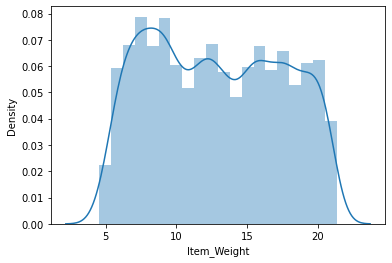

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

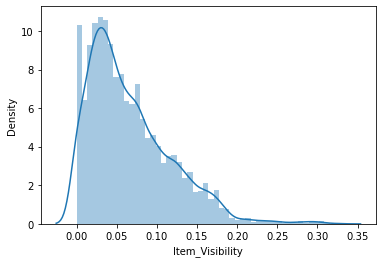

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

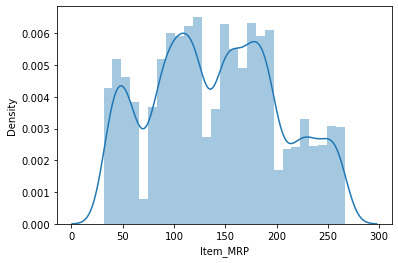

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

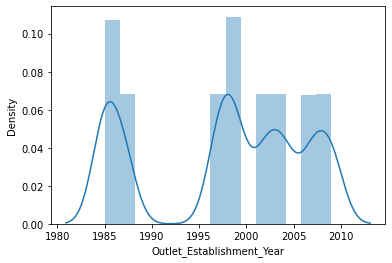

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

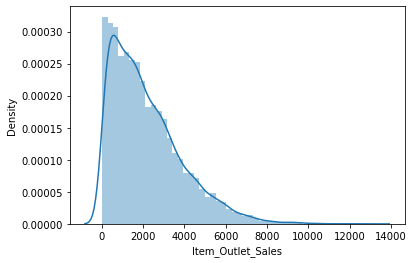

In [45]:
# Reviewing the distributions of the integer columns

for i in train_data.describe().columns:
    sns.distplot(train_data[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

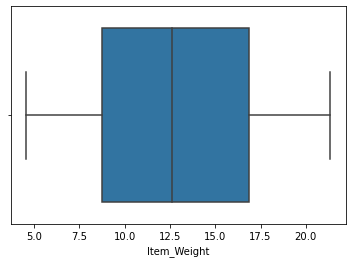

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

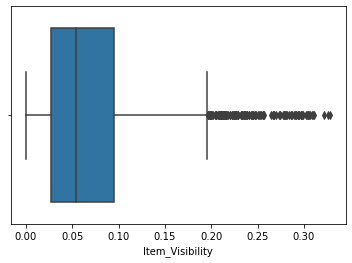

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

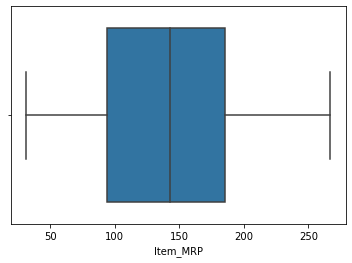

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

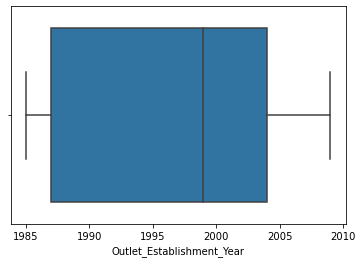

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

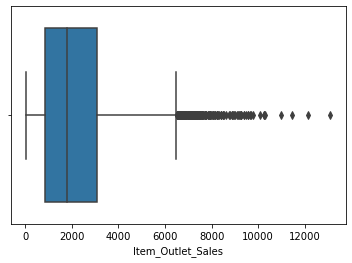

In [46]:
# More analysis on the Outliers and Data distribution

for i in train_data.describe().columns:
    sns.boxplot(train_data[i].dropna())
    plt.show()

In [47]:
train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<IPython.core.display.Javascript object>

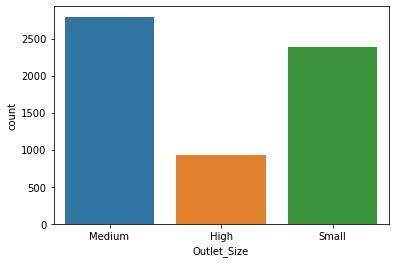

In [48]:
# Distribution of Outlet Size Type

sns.countplot(data = train_data, x = 'Outlet_Size')

<IPython.core.display.Javascript object>

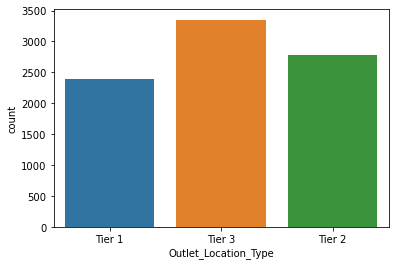

In [49]:
# Distribution of Outlet Location Type

sns.countplot(data = train_data, x = 'Outlet_Location_Type')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

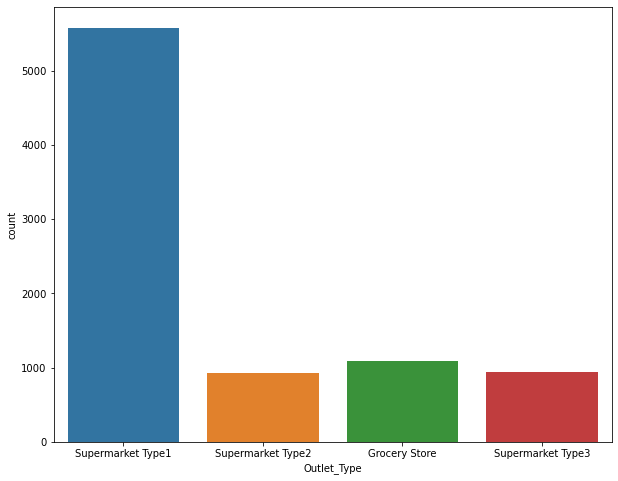

In [50]:
# Distribution of Outlet Type

plt.figure(figsize = (10,8))
sns.countplot(data = train_data, x = 'Outlet_Type')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

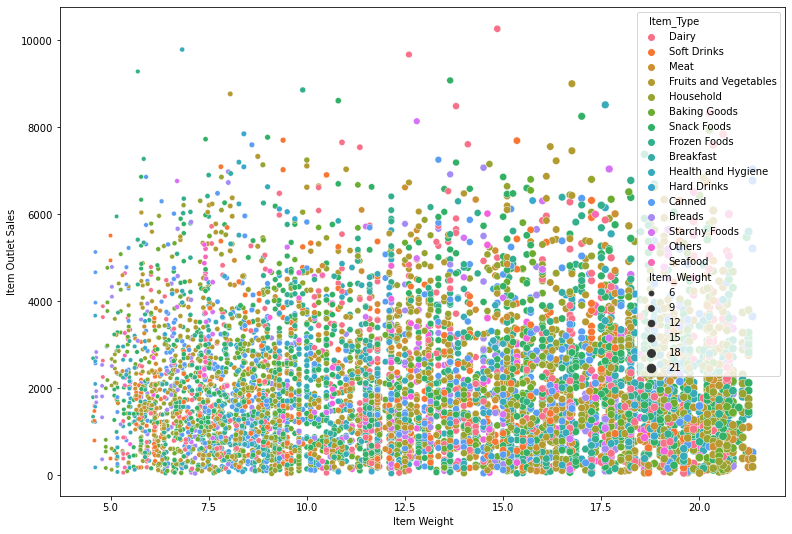

In [51]:
# Let's check the relation among Item Weigth and Item Outlet Sales

plt.figure(figsize = (13,9))
plt.xlabel("Item Weight")
plt.ylabel("Item Outlet Sales")
sns.scatterplot(data = train_data, x = 'Item_Weight', y = 'Item_Outlet_Sales', hue = 'Item_Type', size = 'Item_Weight')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

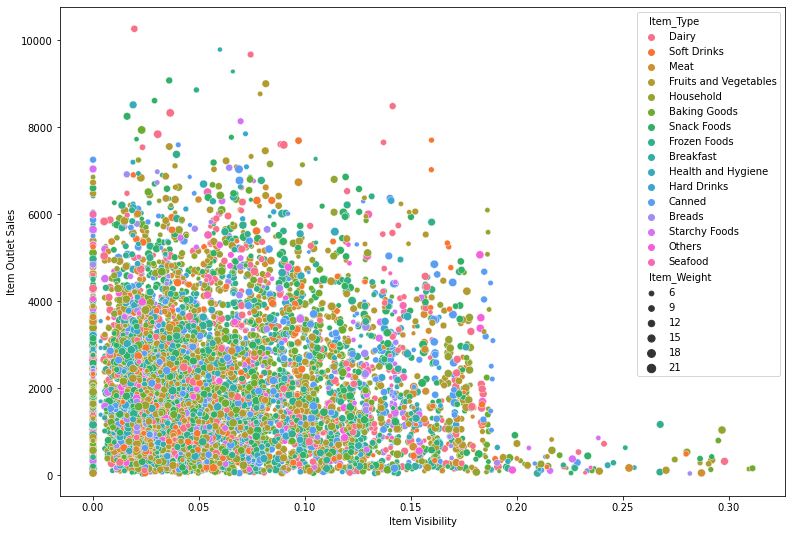

In [52]:
# Let's check the relation among Item Visibility and Item Outlet Sales

plt.figure(figsize = (13,9))
plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet Sales")
sns.scatterplot(data = train_data, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue = 'Item_Type', size = 'Item_Weight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

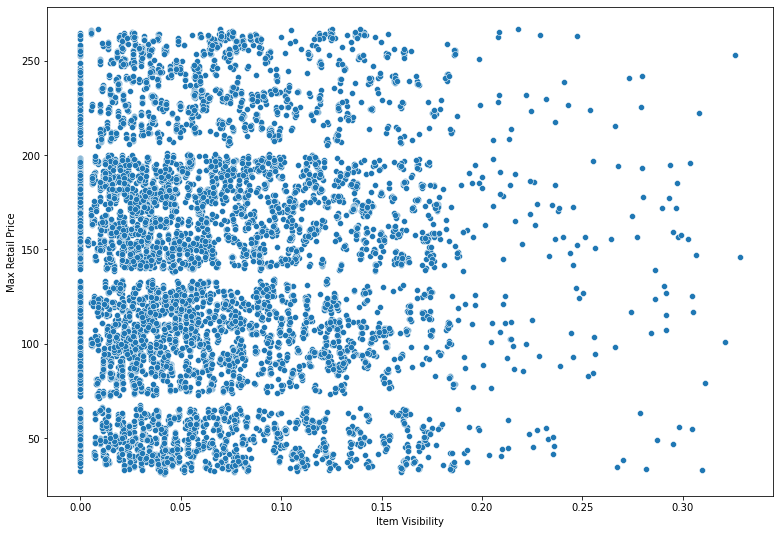

In [53]:
# Let's check the relation among Item Visibility and Maximum Retail Price

plt.figure(figsize = (13,9))
plt.xlabel("Item Visibility")
plt.ylabel("Max Retail Price")
sns.scatterplot(data = train_data, x = 'Item_Visibility', y = 'Item_MRP')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

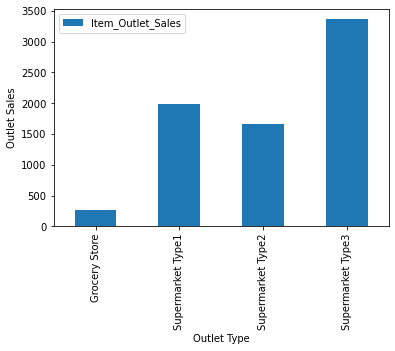

In [54]:
# Let's check the Distribution of Outlet Type with respect to Outlet Sales

outlet_type_pivot = \
train_data.pivot_table(index= 'Outlet_Type', values = 'Item_Outlet_Sales', aggfunc= np.median)

outlet_type_pivot.plot(kind = 'bar')
plt.xlabel("Outlet Type")
plt.ylabel("Outlet Sales")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

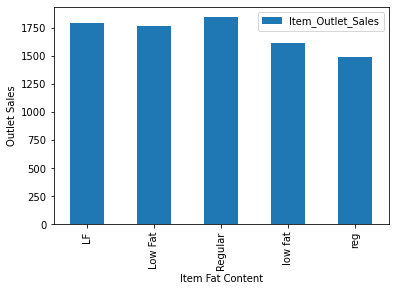

In [55]:
# Let's check the Distribution of Outlet Sales with respect to item fat content

fat_content_pivot = \
train_data.pivot_table(index= 'Item_Fat_Content', values = 'Item_Outlet_Sales', aggfunc= np.median)

fat_content_pivot.plot(kind = 'bar')
plt.xlabel("Item Fat Content")
plt.ylabel("Outlet Sales")
plt.show()

In [57]:
# From above we can see Low Fat, LF, low fat resembles same as these are naming discrepencies

df.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [44]:
# Let's use the same name for Low fat for all entries

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'reg' : 'Regular', 'low fat': 'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

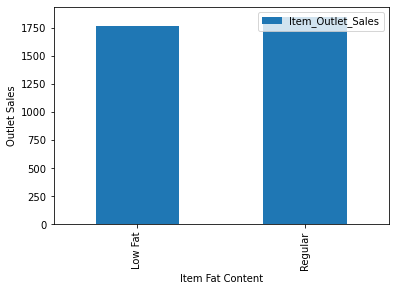

In [45]:
# Let's check the Distribution of Outlet Sales with respect to item fat content

train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'reg' : 'Regular', 'low fat': 'Low Fat'})
train_data['Item_Fat_Content'].value_counts()

fat_content_pivot = \
train_data.pivot_table(index= 'Item_Fat_Content', values = 'Item_Outlet_Sales', aggfunc= np.median)

fat_content_pivot.plot(kind = 'bar')
plt.xlabel("Item Fat Content")
plt.ylabel("Outlet Sales")
plt.show()

In [46]:
# Let's check the correlation between the Numerical attributes of the train data

train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

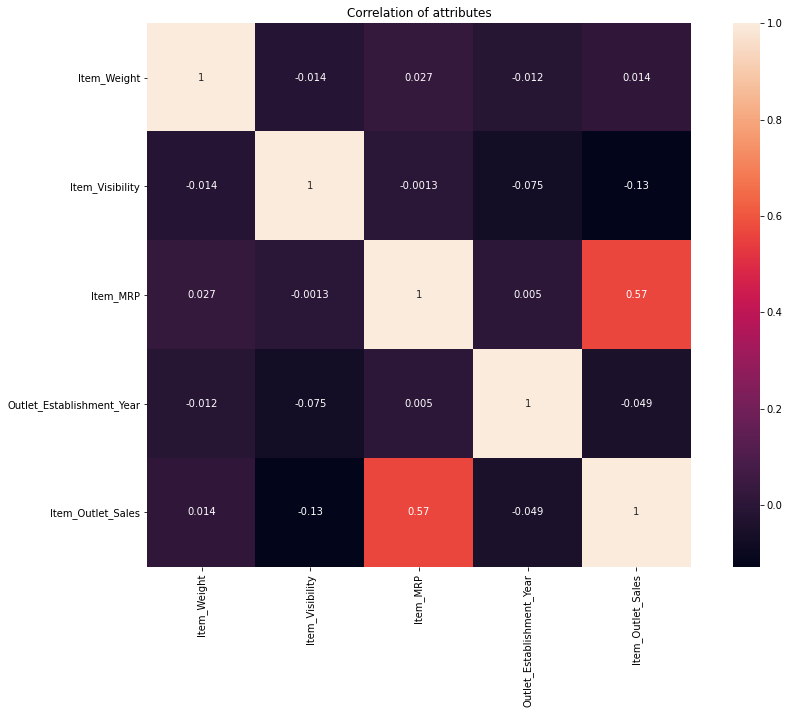

In [48]:
# Let's check the correlation with heatmap now

plt.figure(figsize = (15,10))
sns.heatmap(train_data.corr(), vmax = 1, square = True, annot = True)
plt.title("Correlation of attributes")
plt.show()